In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
import tqdm as tq
from matplotlib import style
import warnings

#### [RQ1] Exploratory Data Analysis


One step is to observe the head of the data to have a first visual approach of the table under examination. Proceed by displaying only the first 5 observations. After the first phase of exploration of data types, characteristics are extracted from the data.

In [3]:
df_prof = pd.read_csv ('instagram_profiles.csv', delimiter='\t' )
df_prof.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [3]:
df_post = pd.read_csv("instagram_posts.csv", delimiter='\t', nrows=10000)
df_post.head()

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [36]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sid              10000 non-null  int64 
 1   sid_profile      10000 non-null  int64 
 2   post_id          10000 non-null  object
 3   profile_id       10000 non-null  int64 
 4   location_id      10000 non-null  int64 
 5   cts              10000 non-null  object
 6   post_type        10000 non-null  int64 
 7   description      9228 non-null   object
 8   numbr_likes      10000 non-null  int64 
 9   number_comments  10000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 781.4+ KB


In [4]:
df_loc = pd.read_csv ('instagram_locations.csv', delimiter='\t' )
df_loc.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


RQ5 The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

 1. Plot the top 10 most popular users in terms of followers and their number of posts.

,profile_id,followers,n_posts
2880218,2.502532e+07,285457645.0,5760.0
2582507,3.416684e+06,65269440.0,7355.0
3820939,2.082449e+07,35339708.0,28816.0
701965,1.876191e+08,30689316.0,3352.0
2414951,2.125507e+09,30246783.0,2791.0
2785241,4.968651e+08,29542143.0,990.0
333193,2.341008e+07,29176804.0,4566.0
3934581,2.423993e+07,29042823.0,4719.0
1311970,5.041706e+07,26476004.0,1311.0
1703764,9.070254e+08,26252169.0,1173.0


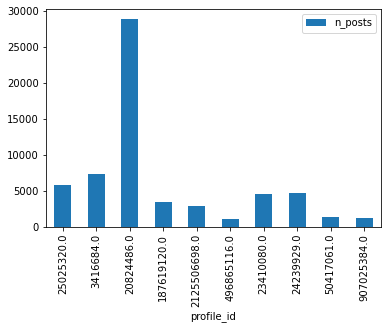

In [11]:
#load just the columns which we need 
Top10 = pd.DataFrame(df_prof.loc[:,["profile_id", "followers","n_posts",]])
#avoid the "Nan" problem
Top10.fillna(0,inplace = True)     
#sort by top 10 
Top10 = Top10.sort_values(by=["followers"],ascending=False).head(10)   
#plot it 
Top10.plot(kind = "bar",x = "profile_id", y = "n_posts")
Top10

2. Who is the most influential user?

In [12]:
Top10.head(1)

,profile_id,followers,n_posts
2880218,25025320.0,285457645.0,5760.0


3. Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited

In [13]:
#extract top 10 user and build the dataframe:

t10 = Top10[["profile_id"]]
t10

,profile_id
2880218,2.502532e+07
2582507,3.416684e+06
3820939,2.082449e+07
701965,1.876191e+08
2414951,2.125507e+09
2785241,4.968651e+08
333193,2.341008e+07
3934581,2.423993e+07
1311970,5.041706e+07
1703764,9.070254e+08


In [14]:
#merging top 10 profiles and their locations from df_posts
top10_loc = pd.DataFrame(columns = ["profile_id","post_id","location_id",])
for chunk in pd.read_csv('instagram_posts.csv',on_bad_lines = "skip",sep = "\t",chunksize= 500000,usecols=["profile_id","post_id","location_id"]):
    top10loc= pd.merge(chunk,t10)
    top10_loc = pd.concat([top10_loc ,top10loc])
    
top10_loc

,profile_id,post_id,location_id
0,25025320,Ss3ULFBQeM,5.332856e+06
0,25025320.0,BeECzRuh1O6,5.873874e+08
0,25025320,Brl3hGMAxiy,8.770667e+14
0,20824486.0,BFrYARaRh55,6.294880e+05
0,25025320,BZNHb3ijnDT,3.500213e+08
...,...,...,...
0,25025320,BswHrnTB2HN,8.385239e+08
1,25025320,Bi7wE8uBWNI,1.011689e+09
2,20824486,rdbaZkRhzl,2.440213e+08
0,20824486,Bf4WZMdljVZ,4.336041e+08


In [16]:
#building a new dataframe with posts and location's name of the top 10 profile ids 
loctag = pd.merge(top10_loc,df_loc[["id","name"]],left_on = "location_id",right_on="id")
loctag

,profile_id,post_id,location_id,id,name
0,25025320,Ss3ULFBQeM,5.332856e+06,5332856,Rosa Parks Plaza
1,25025320.0,BeECzRuh1O6,5.873874e+08,587387369,Ethiopian Highlands
2,25025320,Brl3hGMAxiy,8.770667e+14,877066659067597,Machu Picchu
3,20824486.0,BFrYARaRh55,6.294880e+05,629488,David Crombie Park
4,25025320,BZNHb3ijnDT,3.500213e+08,350021298,Parkland County
...,...,...,...,...,...
100,25025320,BswHrnTB2HN,8.385239e+08,838523900,Stanislaus National Forest
101,25025320,Bi7wE8uBWNI,1.011689e+09,1011688667,Leuser Ecosystem
102,20824486,rdbaZkRhzl,2.440213e+08,244021299,InfoCision Stadium–Summa Field
103,20824486,Bf4WZMdljVZ,4.336041e+08,433604130,The Toyta Center


In [17]:
#the most frequent areas:
most = loctag.groupby("name").count()
most.sort_values(by="profile_id",ascending=False).head(10)

,profile_id,post_id,location_id,id
name,,,,
"Sydney, Australia",9,9,9,9
Victoria's Secret,4,4,4,4
"Kobe-shi, Hyogo, Japan",3,3,3,3
Wells Fargo Center,2,2,2,2
Bel-Air Estate,2,2,2,2
"Bora Bora, French Polynesia",2,2,2,2
666 Fifth Avenue,1,1,1,1
Rakuten Performance Center,1,1,1,1
Singapore Changi Airport,1,1,1,1


Text(0.5, 1.05, 'Most frequent areas have been visited ')

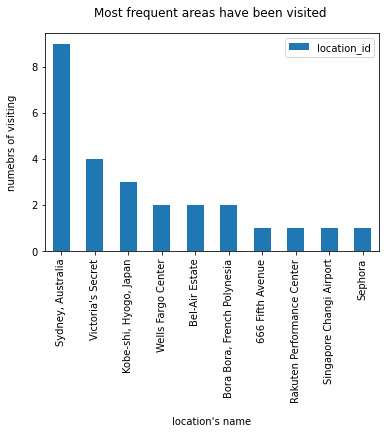

In [18]:
#the most frequent areas plot
most_frequent = most.sort_values(by="profile_id",ascending=False).head(10)
most_frequent.plot(kind="bar",y = "location_id")
plt.xlabel("location's name", labelpad = 14)
plt.ylabel("numebrs of visiting", labelpad = 14)
plt.title("Most frequent areas have been visited ", y = 1.05)

5-4 How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [33]:
#extracting post_type column from instagram_post and building a new dataframe
pic_reel = pd.DataFrame(columns = ["profile_id","post_id","post_type"])
for chunk in pd.read_csv('instagram_posts.csv',on_bad_lines = "skip",sep = "\t",chunksize= 500000,usecols=["profile_id","post_id","post_type"]):
    post_type= pd.merge(chunk,t10)
    pic_reel = pd.concat([pic_reel,post_type])
    
pic_reel

,profile_id,post_id,post_type
0,25025320,Ss3ULFBQeM,1
0,25025320.0,BeECzRuh1O6,1
0,25025320,Brl3hGMAxiy,1
0,20824486.0,BFrYARaRh55,1
0,25025320,BZNHb3ijnDT,1
...,...,...,...
0,25025320,BswHrnTB2HN,1
1,25025320,Bi7wE8uBWNI,1
2,20824486,rdbaZkRhzl,1
0,20824486,Bf4WZMdljVZ,2


In [20]:
#sorting
pic_reels = pic_reel.groupby("post_type").count()
pic_reels

,profile_id,post_id
post_type,,
1,128,128
2,13,13


Text(0.5, 1.05, 'percentages of picture and reels have published ')

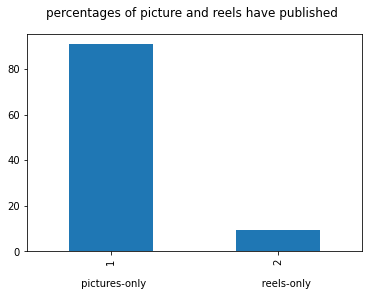

In [21]:
pic_reels["percentage"] = (pic_reels['profile_id'] / pic_reels['profile_id'].sum()) * 100
pic_reels["percentage"].plot(kind="bar")
plt.xlabel(" pictures-only                                     reels-only", labelpad = 14)
plt.title("percentages of picture and reels have published ", y = 1.05)

As we can see from the plot top 10 users have published picture-only posts approximatly 4 times more then reels_only posts. and also they published 128 pictures_only and 13 reels_only. It is important to be mention that they hidden some of their posts and reels after get more users and this numbers are not the real activity of them from the starting of their pages.

5.5 How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [37]:
#building a dataframe consist of  likes and comments on the posts of the top 10 users.
like_comment = pd.DataFrame(columns = ["profile_id","post_id","post_type","numbr_likes","number_comments"])
for chunk in pd.read_csv('instagram_posts.csv',on_bad_lines = "skip",sep = "\t",chunksize= 500000,usecols=["profile_id","post_id","post_type","numbr_likes","number_comments"]):
    comment= pd.merge(chunk,t10)
    like_comment = pd.concat([like_comment,comment])
    
like_comment

,profile_id,post_id,post_type,numbr_likes,number_comments
0,25025320,Ss3ULFBQeM,1,125428,1240
0,25025320.0,BeECzRuh1O6,1,669786,4818
0,25025320,Brl3hGMAxiy,1,1914299,20065
0,20824486.0,BFrYARaRh55,1,164521,1415
0,25025320,BZNHb3ijnDT,1,840588,3627
...,...,...,...,...,...
0,25025320,BswHrnTB2HN,1,1081084,12568
1,25025320,Bi7wE8uBWNI,1,1083329,15154
2,20824486,rdbaZkRhzl,1,106588,1475
0,20824486,Bf4WZMdljVZ,2,157695,541


In [23]:
#extract number of followers from profile and merging with our new dataframe:
num_like = like_comment[["profile_id","post_type","numbr_likes","number_comments"]]
fol = pd.DataFrame(df_prof[["followers","profile_id"]])
summation= pd.merge(num_like,fol,on="profile_id")
# sum the number of likes and comment base on the 2 types (reel and picture)
summation[["post_type","numbr_likes","number_comments"]].groupby("post_type").sum()

,numbr_likes,number_comments
post_type,,
1,69285634.0,497013.0
2,3464814.0,26258.0


In [53]:
#total number of like and comments of each user
total = summation[["profile_id","numbr_likes","number_comments"]].groupby("profile_id").agg(np.average)
total

,numbr_likes,number_comments
profile_id,,
3.416684e+06,2.395093e+05,479.714286
2.082449e+07,2.325301e+05,1070.888889
2.341008e+07,8.121350e+04,365.000000
2.423993e+07,1.303222e+05,774.269231
2.502532e+07,8.783578e+05,6619.117647
5.041706e+07,8.631133e+05,8594.733333
1.876191e+08,1.868570e+05,867.000000
4.968651e+08,4.730227e+05,2237.083333
9.070254e+08,1.027102e+06,6582.461538


In [54]:
#averaging of the likes and comments for top 10 users 
average = summation[["profile_id","numbr_likes","number_comments"]].groupby("profile_id").agg(np.average)
average = average.rename(columns={"numbr_likes": "average of like", "number_comments": "average of comments"})
average = average.round({'average of like': 1, 'average of comments': 1})
average

,average of like,average of comments
profile_id,,
3.416684e+06,239509.3,479.7
2.082449e+07,232530.1,1070.9
2.341008e+07,81213.5,365.0
2.423993e+07,130322.2,774.3
2.502532e+07,878357.8,6619.1
5.041706e+07,863113.3,8594.7
1.876191e+08,186857.0,867.0
4.968651e+08,473022.7,2237.1
9.070254e+08,1027101.8,6582.5


In [46]:
#Adding number of followers from TOP10
final = pd.merge(average,Top10,on = "profile_id")
final

,profile_id,average of like,average of comments,followers,n_posts
0,3.416684e+06,239509.3,479.7,65269440.0,7355.0
1,2.082449e+07,232530.1,1070.9,35339708.0,28816.0
2,2.341008e+07,81213.5,365.0,29176804.0,4566.0
3,2.423993e+07,130322.2,774.3,29042823.0,4719.0
4,2.502532e+07,878357.8,6619.1,285457645.0,5760.0
5,5.041706e+07,863113.3,8594.7,26476004.0,1311.0
6,1.876191e+08,186857.0,867.0,30689316.0,3352.0
7,4.968651e+08,473022.7,2237.1,29542143.0,990.0
8,9.070254e+08,1027101.8,6582.5,26252169.0,1173.0
9,2.125507e+09,100862.9,963.2,30246783.0,2791.0


In [57]:
# merging to have all data in one table 
fin = pd.merge(final,total,on = "profile_id")
fin

,profile_id,average of like,average of comments,followers,n_posts,engagment_rate,numbr_likes,number_comments
0,3.416684e+06,239509.3,479.7,65269440.0,7355.0,NaN,2.395093e+05,479.714286
1,2.082449e+07,232530.1,1070.9,35339708.0,28816.0,NaN,2.325301e+05,1070.888889
2,2.341008e+07,81213.5,365.0,29176804.0,4566.0,NaN,8.121350e+04,365.000000
3,2.423993e+07,130322.2,774.3,29042823.0,4719.0,NaN,1.303222e+05,774.269231
4,2.502532e+07,878357.8,6619.1,285457645.0,5760.0,NaN,8.783578e+05,6619.117647
5,5.041706e+07,863113.3,8594.7,26476004.0,1311.0,NaN,8.631133e+05,8594.733333
6,1.876191e+08,186857.0,867.0,30689316.0,3352.0,NaN,1.868570e+05,867.000000
7,4.968651e+08,473022.7,2237.1,29542143.0,990.0,NaN,4.730227e+05,2237.083333
8,9.070254e+08,1027101.8,6582.5,26252169.0,1173.0,NaN,1.027102e+06,6582.461538
9,2.125507e+09,100862.9,963.2,30246783.0,2791.0,NaN,1.008629e+05,963.153846


In [60]:
#calculating the average of comment and lik for each users
fin ['engagment_rate'] = ((fin ['numbr_likes'] + fin['number_comments']) / fin['followers'])*100
engagment_rate = fin.sort_values(by="followers",ascending=False)
engagment_rate 

,profile_id,average of like,average of comments,followers,n_posts,engagment_rate,numbr_likes,number_comments
4,2.502532e+07,878357.8,6619.1,285457645.0,5760.0,0.310020,8.783578e+05,6619.117647
0,3.416684e+06,239509.3,479.7,65269440.0,7355.0,0.367690,2.395093e+05,479.714286
1,2.082449e+07,232530.1,1070.9,35339708.0,28816.0,0.661016,2.325301e+05,1070.888889
6,1.876191e+08,186857.0,867.0,30689316.0,3352.0,0.611692,1.868570e+05,867.000000
9,2.125507e+09,100862.9,963.2,30246783.0,2791.0,0.336651,1.008629e+05,963.153846
7,4.968651e+08,473022.7,2237.1,29542143.0,990.0,1.608752,4.730227e+05,2237.083333
2,2.341008e+07,81213.5,365.0,29176804.0,4566.0,0.279601,8.121350e+04,365.000000
3,2.423993e+07,130322.2,774.3,29042823.0,4719.0,0.451390,1.303222e+05,774.269231
5,5.041706e+07,863113.3,8594.7,26476004.0,1311.0,3.292445,8.631133e+05,8594.733333
8,9.070254e+08,1027101.8,6582.5,26252169.0,1173.0,3.937520,1.027102e+06,6582.461538


One of the most important consept in social media is ENGAGMENT RATE.
Engagement rate measures the amount of interaction social media content earns relative to reach or followers or audience size.
To calculate the Instagram engagement rate for a post, divide the total number of likes and comments by your follower count, and then multiply by 100 to give you a percentage.
So as we could see from the last table although the fist one with more that 285 millions followers, it has .31% engagment rate. 
Among top 10 influencers of our database, the last one with around 26 millions of user has the most engagment rate.

RQ 6. It's time to get information from the user posting effectiveness.

6.1 What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

6.1.1 Average time (days and minutes) a user lets pass before publishing another post?

In [44]:
# importing the columns needed for this question from posts csv file
ave_time = pd.DataFrame(columns = ["profile_id", "cts","number_comments","numbr_likes"])
for chunk in pd.read_csv('instagram_posts.csv', on_bad_lines = "skip", sep="\t",chunksize=500000,usecols=["profile_id", "cts","number_comments","numbr_likes"]):
    
    ave_time =pd.concat([chunk, ave_time])
ave_time

,profile_id,cts,numbr_likes,number_comments
42500000,5818974116.0,2019-05-28 17:15:46.000,7,0
42500001,4476124246.0,2019-05-28 15:41:18.000,15,2
42500002,252092664.0,2019-04-12 18:34:10.000,78,18
42500003,20975825.0,2017-05-22 02:36:32.000,88,3
42500004,1223699862.0,2018-03-17 23:59:55.000,201,25
...,...,...,...,...
499995,640142065,2018-03-18 13:01:16.000,156,1
499996,26677461,2018-07-03 04:16:38.000,363,19
499997,1418434628,2019-05-25 01:02:19.000,192,2
499998,56011474,2018-11-22 22:41:47.000,428,26


In [45]:
#changing the format of timestamp
ave_time['cts'] = pd.to_datetime(ave_time['cts'], format='%Y-%m-%d %H:%M:%S.%f')

In [54]:
# calculating the first and last posts each user published
top20 = ave_time.groupby("profile_id").aggregate({'cts':["max", "min", "count"]})

In [59]:
# counting users published more than 1 post 
top20 =  top20 [top20.cts["count"] > 1]
# calculating the average of time for publishing between posts for each users
top20 ["meantime_of_publishing_posts"] = (top20 .cts['max'] - top20 .cts['min']) / (top20 .cts['count']-1)
top20

cts                            \
                             max                 min count   
profile_id                                                   
3.000000e+00 2013-02-02 22:02:59 2010-07-19 01:12:23    14   
4.000000e+00 2019-05-05 08:03:36 2010-07-22 12:19:51    37   
1.100000e+01 2019-04-25 06:50:14 2019-04-18 23:21:22     2   
1.900000e+01 2019-04-17 07:44:13 2010-10-23 18:48:33    51   
2.300000e+01 2016-10-08 00:06:29 2015-11-19 08:57:39     2   
...                          ...                 ...   ...   
1.521107e+10 2019-06-21 20:41:59 2019-06-21 17:52:29     4   
1.523330e+10 2019-06-27 00:11:09 2019-06-26 23:56:47     3   
1.566695e+10 2019-08-06 01:01:31 2019-07-29 21:36:32    11   
9.001013e+13 2018-04-04 09:53:28 2017-06-22 10:56:54    10   
9.001013e+13 2019-04-12 21:39:06 2019-04-12 21:25:36     2   

             meantime_of_publishing_posts             meantime_posts  
                                                                      
profile_id                                                            
3.000000e+00   71 days 12:40:48.923076923 71 days 12:40:48.923076923  
4.000000e+00   89 days 03:12:52.916666666 89 days 03:12:52.916666666  
1.100000e+01              6 days 07:28:52            6 days 07:28:52  
1.900000e+01      61 days 22:49:06.800000    61 days 22:49:06.800000  
2.300000e+01            323 days 15:08:50          323 days 15:08:50  
...                                   ...                        ...  
1.521107e+10              0 days 00:56:30            0 days 00:56:30  
1.523330e+10              0 days 00:07:11            0 days 00:07:11  
1.566695e+10       0 days 17:08:29.900000     0 days 17:08:29.900000  
9.001013e+13   31 days 18:32:57.111111111 31 days 18:32:57.111111111  
9.001013e+13              0 days 00:13:30            0 days 00:13:30  

[4354677 rows x 5 columns]

In [48]:
#extracting followers and followinng from 
follower_ing = df_prof[["profile_id","followers", "following"]]
follower_ing

,profile_id,followers,following
0,4.721050e+09,146.0,250.0
1,5.905830e+08,1145.0,534.0
2,1.074147e+09,324.0,469.0
3,1.472039e+09,NaN,NaN
4,3.531421e+09,NaN,NaN
...,...,...,...
4509581,1.418322e+09,481.0,468.0
4509582,1.340704e+07,NaN,NaN
4509583,6.007354e+09,NaN,NaN
4509584,2.338990e+07,153.0,504.0


In [61]:
# merging for adding followers and following 
fol = pd.merge(top20,follower_ing ,on = "profile_id",)
fol

C:\Users\Vahid\AppData\Local\Temp/ipykernel_22680/3297086942.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  fol = pd.merge(top20,follower_ing ,on = "profile_id",)


,profile_id,"(cts, max)","(cts, min)","(cts, count)","(meantime_of_publishing_posts, )","(meantime_posts, )",followers,following
0,4.000000e+00,2019-05-05 08:03:36,2010-07-22 12:19:51,37,89 days 03:12:52.916666666,89 days 03:12:52.916666666,4937112.0,825.0
1,1.900000e+01,2019-04-17 07:44:13,2010-10-23 18:48:33,51,61 days 22:49:06.800000,61 days 22:49:06.800000,119775.0,1530.0
2,2.800000e+01,2019-04-16 05:10:12,2011-02-19 20:16:29,92,32 days 17:14:26.186813186,32 days 17:14:26.186813186,113310.0,505.0
3,3.300000e+01,2013-03-30 22:35:38,2011-04-30 06:13:46,2,700 days 16:21:52,700 days 16:21:52,NaN,NaN
4,3.400000e+01,2019-07-01 20:49:50,2011-07-29 06:24:16,20,152 days 08:20:17.578947368,152 days 08:20:17.578947368,83915.0,919.0
...,...,...,...,...,...,...,...,...
2033878,1.499738e+10,2019-07-11 04:25:20,2019-07-09 03:18:33,12,0 days 04:27:53.363636363,0 days 04:27:53.363636363,786.0,2649.0
2033879,1.501918e+10,2019-07-21 14:05:34,2019-06-19 13:17:00,5,8 days 00:12:08.500000,8 days 00:12:08.500000,516.0,6384.0
2033880,1.523330e+10,2019-06-27 00:11:09,2019-06-26 23:56:47,3,0 days 00:07:11,0 days 00:07:11,4.0,42.0
2033881,1.566695e+10,2019-08-06 01:01:31,2019-07-29 21:36:32,11,0 days 17:08:29.900000,0 days 17:08:29.900000,49.0,59.0


In [50]:
# average time between two posts
meantime = top20["meantime_of_publishing_posts"].mean()
print("average time between two posts for all users:", str(meantime))

average time between two posts for all users: 76 days 17:06:26.772431733


6.1.1Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [74]:
warnings.filterwarnings("ignore")
averages = top20.iloc[: , [2,3]]
mean_times_fols = pd.merge(averages, df_prof, on='profile_id')
mean_times_fols.rename(columns=''.join, inplace=True)
mean_times_fols = mean_times_fols.dropna()
mean_times_fols.sort_values(by = 'meantime_of_publishing_posts' , ascending = True)
mean_time_final = mean_times_fols[["profile_id","ctscount","meantime_of_publishing_posts","following","followers"]]
mean_time_final

,profile_id,ctscount,meantime_of_publishing_posts,following,followers
1,1.900000e+01,51,61 days 22:49:06.800000,1530.0,119775.0
2,2.800000e+01,92,32 days 17:14:26.186813186,505.0,113310.0
4,3.400000e+01,20,152 days 08:20:17.578947368,919.0,83915.0
6,7.200000e+01,63,50 days 17:51:11.935483870,843.0,709198.0
11,1.640000e+02,13,10 days 22:41:26.666666666,410.0,1582.0
...,...,...,...,...,...
2033859,1.445114e+10,11,2 days 16:55:06,439.0,353.0
2033864,1.446179e+10,4,3 days 03:18:50.666666666,198.0,30.0
2033867,1.448963e+10,9,4 days 06:12:22.125000,129.0,80.0
2033878,1.499738e+10,12,0 days 04:27:53.363636363,2649.0,786.0


In [75]:
#Top10 = Top10.sort_values(by=["followers"],ascending=False).head(10)
top3 = mean_time_final.sort_values(by = "meantime_of_publishing_posts", ascending=True)
top3= top3.head(3)
top3

,profile_id,ctscount,meantime_of_publishing_posts,following,followers
1952691,1.038041e+10,12,0 days 00:00:02,959.0,73.0
907211,1.458407e+09,6,0 days 00:00:02,6906.0,575.0
651273,4.598318e+08,3,0 days 00:00:02,1299.0,123.0


TypeError: set_ticks() takes 2 positional arguments but 3 were given

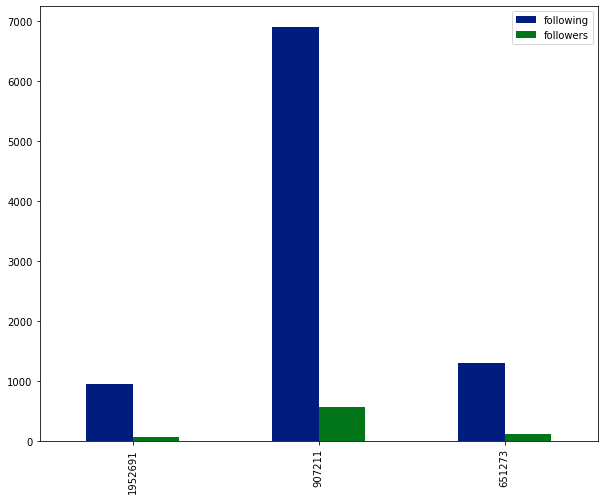

In [85]:
style.use('seaborn-dark-palette')
ax =top3.plot(kind='bar', y=["following", "followers"], figsize=(10,8))
labels = top3.profile_id.iloc[:3]
ax.set_xticks([0,1,2], labels)
plt.title("Top 3 users'")
plt.xlabel("profile_id")
plt.show()

6.2 Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [87]:
#defining a new function for this question 
posts = ave_time

In [89]:
# Changing the timestamps format
posts['cts'] = pd.to_datetime(posts['cts'], format='%Y-%m-%d %H:%M:%S.%f')
dfCopy = posts.copy()
# Changing the timestamps into hour
dfCopy['cts'] = dfCopy.cts.dt.hour

In [98]:

highest = dfCopy.groupby(pd.cut(dfCopy['cts'],  np.arange(0, 26, 2)))['numbr_likes', 'number_comments'].mean()
highest.head()

,numbr_likes,number_comments
cts,,
"(0, 2]",272.520189,7.726647
"(2, 4]",267.665914,7.135964
"(4, 6]",257.449635,6.703394
"(6, 8]",263.997820,7.393859
"(8, 10]",277.757407,7.493787


In [99]:
#calculating the highest average of like and comments 
print(f"Highest average of likes: {highest.numbr_likes.max():{2}.{5}}")
print(f"Highest average of comments: {highest.number_comments.max():{2}.{3}}")

Highest average of likes: 301.6
Highest average of comments: 8.07


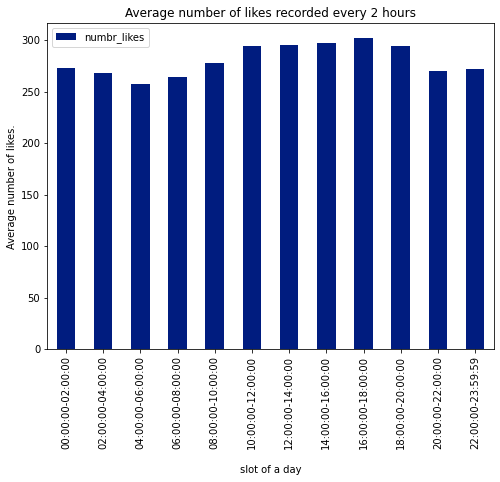

In [100]:
#dividing a day to 12 slots 
labels = ["00:00:00-02:00:00","02:00:00-04:00:00","04:00:00-06:00:00","06:00:00-08:00:00","08:00:00-10:00:00","10:00:00-12:00:00",
         "12:00:00-14:00:00", "14:00:00-16:00:00","16:00:00-18:00:00","18:00:00-20:00:00","20:00:00-22:00:00","22:00:00-23:59:59"]
#plot the average number of likes recorded every 2 hours 
style.use('seaborn-dark-palette')
highest.plot(kind='bar', y='numbr_likes', figsize=(8,6))
plt.title("Average number of likes recorded every 2 hours")
plt.xlabel("\ntime slots of a day")
plt.ylabel("Average number of likes.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

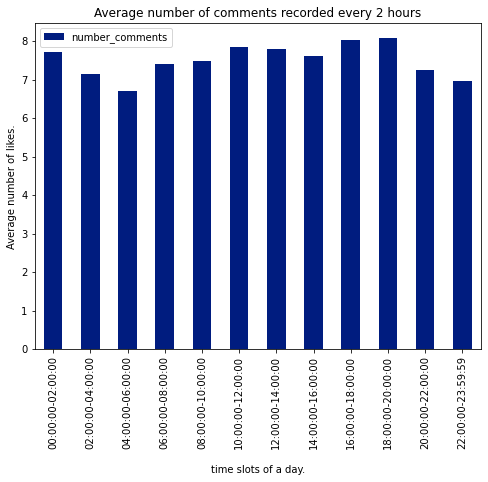

In [103]:
#polting the average of comments recorded every 2 hours 
highest.plot(kind='bar', y='number_comments', figsize=(8,6))
plt.title("Average number of comments recorded every 2 hours")
plt.xlabel("\ntime slots of a day.")
plt.ylabel("Average number of likes.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

As we could see from above from 18 to 20 users got the most comments , while during 16 to 18 they got more likes 